In [71]:
import pandas as pd 

#importando arquivos

df_medicos = pd.read_excel('dados_medicos.xlsx')
df_pacientes = pd.read_csv('dados_pacientes.csv',encoding='cp1252', sep=';')
# o arquivo tem codificacao diferente, logo a que usar ncoding='cp1252'
df_estados_br = pd.read_csv('estados_brasileiros.csv', encoding='cp1252', sep=';')

def verificar_df(df):
    print('-' * 50)
    print(df.count())
    for col in df:
        if True in df[col].isnull().values:
            print(f'Coluna {col} possue valores NULOS.')
        if True in df[col].isna().values:
            print(f'Coluna {col} possue valores N.A.')
    print('-' * 50)

verificar_df(df_medicos)
verificar_df(df_pacientes)
verificar_df(df_estados_br)




--------------------------------------------------
id_cliente    547
peso          542
colesterol    547
dtype: int64
Coluna peso possue valores NULOS.
Coluna peso possue valores N.A.
--------------------------------------------------
--------------------------------------------------
id_cliente        1000
id_estado         1000
idade             1000
genero            1000
estado Civil      1000
renda             1000
nivel_educacao    1000
dtype: int64
--------------------------------------------------
--------------------------------------------------
id_estado       27
estado          27
sigla_estado    27
pais            27
dtype: int64
--------------------------------------------------


Observa-se que o df_medicos na coluna peso temos arquivos nulos.

In [72]:
#descritiva dos dados antes da adequacao de valores nulos
df_medicos['peso'].describe()

count    542.000000
mean     143.440959
std       30.836868
min       95.000000
25%      116.000000
50%      140.000000
75%      171.000000
max      203.000000
Name: peso, dtype: float64

In [73]:
#coletando dados descritivos do df-medicos, da coluna peso, arredondando valores pra duas casas decimais
#transformando em dicionario e pegando a media
mean_peso = df_medicos['peso'].describe().round(2).to_dict()['mean']
print(f'A media de peso é : {mean_peso}')

A media de peso é : 143.44


In [74]:
#subistituindo valores na em df_medicos pela media encontrada
df_medicos = df_medicos.fillna(mean_peso)
df_medicos['peso'].describe()

count    547.000000
mean     143.440951
std       30.695348
min       95.000000
25%      116.000000
50%      140.000000
75%      171.000000
max      203.000000
Name: peso, dtype: float64

In [75]:
#juntar as tabelas pelos id_estado e id_cliente
df_geral = pd.merge(df_pacientes, df_medicos, on='id_cliente')
df_geral = pd.merge(df_geral,df_estados_br,on='id_estado').sort_values('id_cliente')
verificar_df(df_geral)
print(df_geral.dtypes)


--------------------------------------------------
id_cliente        547
id_estado         547
idade             547
genero            547
estado Civil      547
renda             547
nivel_educacao    547
peso              547
colesterol        547
estado            547
sigla_estado      547
pais              547
dtype: int64
--------------------------------------------------
id_cliente          int64
id_estado           int64
idade               int64
genero             object
estado Civil       object
renda             float64
nivel_educacao     object
peso              float64
colesterol          int64
estado             object
sigla_estado       object
pais               object
dtype: object


In [76]:
print(df_geral.describe().round(2))

       id_cliente  id_estado   idade    renda    peso  colesterol
count      547.00     547.00  547.00   547.00  547.00      547.00
mean       274.00      14.59   40.84  5474.51  143.44      170.43
std        158.05       7.71   14.21  2672.42   30.70       39.15
min          1.00       1.00   18.00  1009.40   95.00      102.00
25%        137.50       8.00   28.00  3127.86  116.00      136.00
50%        274.00      14.00   40.00  5533.45  140.00      169.00
75%        410.50      21.00   53.00  7851.46  171.00      208.00
max        547.00      27.00   65.00  9989.72  203.00      235.00


In [77]:
df_geral.sort_values('estado').head()

,id_cliente,id_estado,idade,genero,estado Civil,renda,nivel_educacao,peso,colesterol,estado,sigla_estado,pais
292,436,1,63,Feminino,Divorciado,7626.21,Superior,155.0,196,Acre,AC,Brasil
283,21,1,65,Outro,Divorciado,3303.41,Médio,153.0,189,Acre,AC,Brasil
282,20,1,33,Feminino,Viúvo,2510.78,Fundamental,133.0,163,Acre,AC,Brasil
286,165,1,25,Outro,Casado,2485.56,Superior,107.0,125,Acre,AC,Brasil
287,227,1,60,Masculino,Solteiro,6724.74,Superior,184.0,220,Acre,AC,Brasil


# Pergunta 2

In [78]:
#Qual é a idade média das pessoas que residem no estado de Minas Gerais?

#Agrupando por estado e fazendo a media das idades
df_geral[['estado','idade']].groupby('estado').mean().round(2)



,idade
estado,
Acre,45.77
Alagoas,38.67
Amapá,38.26
Amazonas,39.12
Bahia,43.00
Ceará,43.88
Distrito Federal,35.55
Espírito Santo,40.65
Goiás,41.68


# Pergunta 4

Crie um gráfico de caixa (boxplot) para representar a distribuição da renda por gênero das pessoas que residem no estado de Minas Gerais e, em seguida, responda:

Qual é o gênero que possui maior mediana da renda representado no gráfico de caixa?

In [79]:
#cria um novo DataFrame somente como o pessoal de MG com colunas essenciais
df_geral_mg = df_geral[['id_cliente','estado','renda','genero']].where(df_geral['estado']=='Minas Gerais').sort_values('estado', ascending=False).dropna()

df_geral_mg

# df_geral_mg.boxplot(column='renda', by='genero')


,id_cliente,estado,renda,genero
392,36.0,Minas Gerais,8339.84,Feminino
393,74.0,Minas Gerais,9336.11,Masculino
416,512.0,Minas Gerais,4951.35,Feminino
415,466.0,Minas Gerais,6572.81,Masculino
414,407.0,Minas Gerais,5523.95,Outro
413,391.0,Minas Gerais,8853.22,Outro
412,389.0,Minas Gerais,6019.78,Masculino
411,388.0,Minas Gerais,4849.90,Outro
410,375.0,Minas Gerais,9081.23,Outro
409,318.0,Minas Gerais,7150.53,Masculino


In [80]:
#criando um df pivot separando generos por coluna
df = pd.pivot_table(df_geral_mg, values='renda',columns='genero', index='id_cliente')
df.head(5)

genero,Feminino,Masculino,Outro
id_cliente,,,
36.0,8339.84,NaN,NaN
74.0,NaN,9336.11,NaN
85.0,NaN,1610.89,NaN
99.0,NaN,NaN,9881.47
126.0,NaN,1215.07,NaN


## Para que as plotagens se sobreponham é nescessário 
```
%matplotlib inline
```

genero     Feminino    Masculino        Outro
count      7.000000     9.000000    10.000000
mean    4375.321429  5220.202222  6510.542000
std     2375.798911  2611.842139  2532.481301
min     1481.120000  1215.070000  1736.270000
25%     2847.005000  3799.220000  4962.770000
50%     4006.360000  5651.390000  6456.195000
75%     5552.960000  6572.810000  8610.477500
max     8339.840000  9336.110000  9881.470000


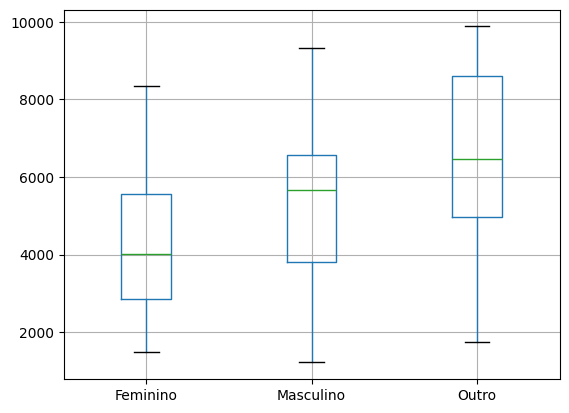

In [81]:
%matplotlib inline

df.boxplot(column=['Feminino', 'Masculino','Outro' ])

print(df.describe())


# Pergunta 6
Crie um gráfico de caixa (boxplot) para representar as idades das pessoas que possuem níveis de educação superior, categorizadas por seu estado civil. Em seguida, escolha o gráfico que melhor representa essa distribuição.

In [82]:
#filtrando por nivel superior
df_geral_nivel_superior = df_geral.where(df_geral['nivel_educacao'] == 'Superior').dropna()
df_geral_nivel_superior
# idade

# cat 'estado Civil'

,id_cliente,id_estado,idade,genero,estado Civil,renda,nivel_educacao,peso,colesterol,estado,sigla_estado,pais
0,1.0,21.0,24.0,Feminino,Divorciado,8672.21,Superior,102.0,111.0,Rio Grande do Sul,RS,Brasil
19,2.0,14.0,60.0,Feminino,Casado,2946.06,Superior,115.0,135.0,Pará,PA,Brasil
67,4.0,18.0,51.0,Masculino,Casado,7871.49,Superior,140.0,167.0,Piauí,PI,Brasil
84,5.0,4.0,51.0,Outro,Viúvo,6033.31,Superior,130.0,158.0,Amazonas,AM,Brasil
1,7.0,21.0,53.0,Outro,Viúvo,9074.09,Superior,114.0,131.0,Rio Grande do Sul,RS,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...
502,537.0,22.0,34.0,Outro,Solteiro,3921.33,Superior,127.0,150.0,Rondônia,RO,Brasil
504,539.0,22.0,60.0,Masculino,Divorciado,1292.13,Superior,114.0,133.0,Rondônia,RO,Brasil
294,545.0,1.0,48.0,Outro,Divorciado,6431.65,Superior,107.0,115.0,Acre,AC,Brasil
333,546.0,17.0,26.0,Masculino,Viúvo,9787.90,Superior,117.0,147.0,Pernambuco,PE,Brasil


In [83]:
#criando novo df com colunas de genero
df = pd.pivot_table(df_geral_nivel_superior, values='idade',columns='estado Civil', index='id_cliente')
print(df.head(5))
df.describe()

estado Civil  Casado  Divorciado  Solteiro  Viúvo
id_cliente                                       
1.0              NaN        24.0       NaN    NaN
2.0             60.0         NaN       NaN    NaN
4.0             51.0         NaN       NaN    NaN
5.0              NaN         NaN       NaN   51.0
7.0              NaN         NaN       NaN   53.0


estado Civil,Casado,Divorciado,Solteiro,Viúvo
count,47.000000,54.000000,49.000000,55.000000
mean,41.425532,43.481481,43.612245,42.018182
std,15.241169,13.452559,14.858803,14.038955
min,18.000000,18.000000,18.000000,19.000000
25%,26.500000,36.000000,32.000000,30.500000
50%,40.000000,46.000000,45.000000,41.000000
75%,53.500000,54.250000,56.000000,53.500000
max,65.000000,65.000000,65.000000,65.000000


<Axes: >

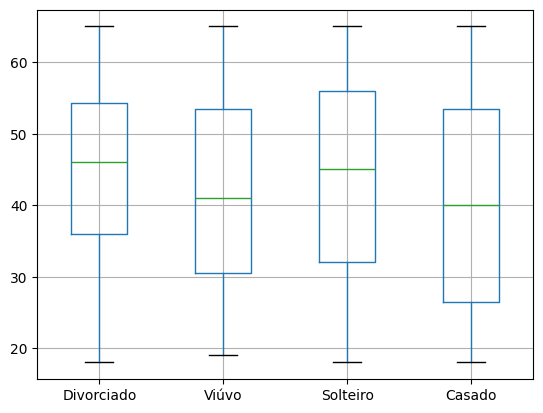

In [84]:

#box plot dos dados
df.boxplot(column=[ 'Divorciado' ,'Viúvo','Solteiro', 'Casado' ])

# Pergunta 7

Calcule estatísticas descritivas para a variável "colesterol" agrupadas por nível de educação. Em seguida, com base nas estatísticas calculadas, escolha a alternativa CORRETA.

In [85]:
#verdade - 01 - A média do colesterol é mais elevada no grupo com nível de educação fundamental em comparação com os outros grupos.
print('--Medias--')
print(df_geral[['nivel_educacao','colesterol']].groupby('nivel_educacao').mean())
#Falsa - 04 - A mediana do colesterol é a mesma em todos os grupos de nível de educação.
print('--Medianas--')
print(df_geral[['nivel_educacao','colesterol']].groupby('nivel_educacao').median())


--Medias--
                colesterol
nivel_educacao            
Fundamental     173.418994
Médio           167.245399
Superior        170.360976
--Medianas--
                colesterol
nivel_educacao            
Fundamental          172.0
Médio                167.0
Superior             169.0


# Pergunta 8

Crie um histograma com 20 barras representando o peso das pessoas. Em seguida, com base no histograma gerado, escolha a alternativa que melhor descreve a distribuição dos pesos.

<Axes: >

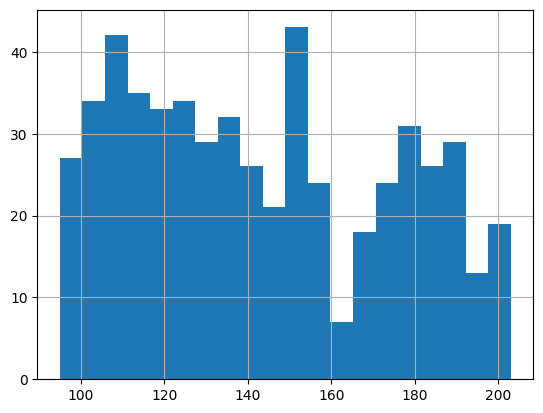

In [86]:
df_geral['peso'].hist(bins=20)

# Pergunta 9

Qual é o estado cujo residente possui a maior renda, e qual é o estado civil dessa pessoa?

In [87]:
df_geral.sort_values('renda',ascending=False).head(1)

,id_cliente,id_estado,idade,genero,estado Civil,renda,nivel_educacao,peso,colesterol,estado,sigla_estado,pais
136,217,12,31,Outro,Casado,9989.72,Superior,203.0,235,Mato Grosso do Sul,MS,Brasil


# Pergunta 10

Crie um gráfico de dispersão que represente as relações entre as variáveis peso (eixo x) e colesterol (eixo y) e selecione o gráfico que melhor ilustra essa relação.

<Axes: xlabel='peso', ylabel='colesterol'>

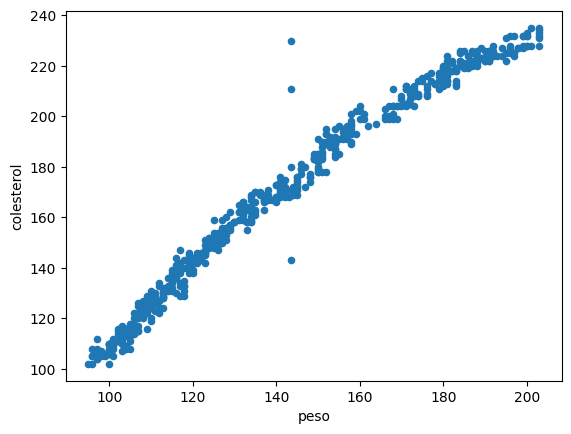

In [88]:
df_geral.plot.scatter(x='peso', y='colesterol')

In [89]:
#mostras quais variaveis numericas possue correlacao entre si
df_geral[['idade', 'renda', 'peso', 'colesterol']].corr(method='pearson')

,idade,renda,peso,colesterol
idade,1.000000,0.031815,0.012782,-0.010509
renda,0.031815,1.000000,-0.026004,-0.026170
peso,0.012782,-0.026004,1.000000,0.985007
colesterol,-0.010509,-0.026170,0.985007,1.000000


# Pergunta 11

Ao aplicar um modelo de regressão linear usando machine learning, responda à seguinte pergunta: Qual é o valor estimado de colesterol para uma pessoa que possui um peso de 128 quilos, com base no modelo?

Separe o conjunto de dados em treinamento e teste e avalie os
resultados baseado nos dados de teste e predição.

a. Utilize
osseguintes
parâmetros:test_size=0.2,
random_state=0

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

#definindo o tamanho do DF de treinio e de teste
n_linhas_treino = int(df_geral['peso'].size*.8)
n_linhas_teste = df_geral['peso'].size - n_linhas_treino
print(f'n. treino: {n_linhas_treino}, n. teste: {n_linhas_teste}')
#convertendo os DF em arrays
x = df_geral['peso'].values.reshape(-1,1)
y = df_geral['colesterol'].values.reshape(-1,1)
print(type(x))
print(type(y))
#definindo DFs
x_treino , x_teste = x[:n_linhas_treino], x[n_linhas_treino:]
y_treino , y_teste = y[:n_linhas_treino], y[n_linhas_treino:]


n. treino: 437, n. teste: 110
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [91]:
#inicializando objd e regracao Linear
rl = linear_model.LinearRegression()

#treinando modelo
rl.fit(x_treino,y_treino)
print(f'O coeficiente é : {rl.coef_.item() :.3f} e o interceptador seria: {rl.intercept_.item() :.3f}')
print(f'A equação é: {rl.coef_.item() :.3f}*x +{rl.intercept_.item() :.3f}')
#fazendo predicao 
y_previsto = rl.predict(x_teste)
#erro quadratico 
erro_quadra = mean_squared_error(y_teste,y_previsto)
print(f'Erro quadratico medido: { erro_quadra.round(2)}')
print(f'Score de Variancia : {r2_score(y_teste, y_previsto).round(2)}')




O coeficiente é : 1.257 e o interceptador seria: -9.800
A equação é: 1.257*x +-9.800
Erro quadratico medido: 36.01
Score de Variancia : 0.98


# Pergunta 11

Ao aplicar um modelo de regressão linear usando machine learning, responda à seguinte pergunta: Qual é o valor estimado de colesterol para uma pessoa que possui um peso de 128 quilos, com base no modelo?

In [92]:
print(f'Colesterol estimado para uma pessoa de 128Kgs é : {rl.predict([[128]]).item() :.2f}')

Colesterol estimado para uma pessoa de 128Kgs é : 151.06


# Pergunta 12

Qual é o valor do coeficiente angular da reta?

In [93]:
print(f'O coeficiente é : {rl.coef_.item() :.2f} ')


O coeficiente é : 1.26 


# Pergunta 13

Qual foi o coeficiente de determinação R² do modelo?

In [97]:
print(f'Score de Variancia (R²) : {r2_score(y_teste, y_previsto).round(2)}')


Score de Variancia (R²) : 0.98


# Pergunta 14

Qual o valor do mean absolute error do modelo criado?

In [95]:
erro_quadra_absol = mean_absolute_error(y_teste,y_previsto)
print(f'Erro quadratico absoluto: { erro_quadra_absol.round(2)}')


Erro quadratico absoluto: 4.9


# Pergunta 15

Qual o valor do mean squared error do modelo criado?

In [96]:
erro_quadra = mean_squared_error(y_teste,y_previsto)
print(f'Erro quadratico medido: { erro_quadra.round(2)}')

Erro quadratico medido: 36.01
